Cargo librerias

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

Creo los dataframe a apertir de archivos de excel

In [2]:
df_train = pd.read_excel('./bike_train.xlsx')
df_train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df_test = pd.read_excel('./bike_test.xlsx')
df_test.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,12000,2012-05-20,2,1,5,4,0,0,0,1,0.52,0.5000,0.68,0.0896
1,12001,2012-05-20,2,1,5,5,0,0,0,1,0.50,0.4848,0.72,0.1045
2,12002,2012-05-20,2,1,5,6,0,0,0,1,0.50,0.4848,0.63,0.1343
3,12003,2012-05-20,2,1,5,7,0,0,0,1,0.52,0.5000,0.68,0.1940
4,12004,2012-05-20,2,1,5,8,0,0,0,1,0.56,0.5303,0.56,0.1642


# EDA

Tabajaremos con series de tiempo, por lo cual todo el analisis va a realizar en este enfoque.

Exploracion de  los Dataframe

Dataframe Train

In [4]:
df_train.shape

(11999, 17)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

In [6]:
print('fecha_inicio', df_train.dteday.min())
print('fecha_fin', df_train.dteday.max())
print(df_train.dteday.max() - df_train.dteday.min())

fecha_inicio 2011-01-01 00:00:00
fecha_fin 2012-05-20 00:00:00
505 days 00:00:00


- Tenemos una `frecuencia de muestreo horaria` y una `ventana temporal` de 505 días. Lo más probable es que sea necesario resamplear la muestra. 

In [7]:
df_train.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,6000.000000,2.210684,0.279523,5.530294,11.556630,0.027752,3.009334,0.684057,1.435036,0.465704,0.448888,0.625770,0.196433,30.049837,128.545129,158.594966
std,3463.957275,1.088798,0.448784,3.433005,6.911891,0.164269,2.005264,0.464910,0.650894,0.188576,0.169633,0.200637,0.125394,43.596915,124.692750,151.392952
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3000.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.303000,0.470000,0.104500,3.000000,29.000000,34.000000
50%,6000.000000,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.460000,0.454500,0.620000,0.194000,13.000000,98.000000,118.000000
75%,8999.500000,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.620000,0.590900,0.790000,0.283600,39.000000,185.000000,232.000000
max,11999.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.000000,1.000000,0.850700,367.000000,770.000000,957.000000


Dataframe TEST

In [8]:
df_test.shape

(5380, 14)

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     5380 non-null   int64         
 1   dteday      5380 non-null   datetime64[ns]
 2   season      5380 non-null   int64         
 3   yr          5380 non-null   int64         
 4   mnth        5380 non-null   int64         
 5   hr          5380 non-null   int64         
 6   holiday     5380 non-null   int64         
 7   weekday     5380 non-null   int64         
 8   workingday  5380 non-null   int64         
 9   weathersit  5380 non-null   int64         
 10  temp        5380 non-null   float64       
 11  atemp       5380 non-null   float64       
 12  hum         5380 non-null   float64       
 13  windspeed   5380 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 588.6 KB


In [10]:
df_test.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,5380.000000,5380.000000,5380.0,5380.000000,5380.000000,5380.000000,5380.000000,5380.00000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000
mean,14689.500000,3.150558,1.0,8.784758,11.524721,0.031041,2.991078,0.67974,1.403532,0.566758,0.535741,0.630483,0.175968
std,1553.216555,0.839184,0.0,2.145166,6.920601,0.173444,2.007032,0.46662,0.612343,0.182800,0.161300,0.174493,0.113988
min,12000.000000,1.000000,1.0,5.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.140000,0.151500,0.160000,0.000000
25%,13344.750000,3.000000,1.0,7.000000,6.000000,0.000000,1.000000,0.00000,1.000000,0.400000,0.409100,0.490000,0.104500
50%,14689.500000,3.000000,1.0,9.000000,12.000000,0.000000,3.000000,1.00000,1.000000,0.600000,0.575800,0.640000,0.164200
75%,16034.250000,4.000000,1.0,11.000000,18.000000,0.000000,5.000000,1.00000,2.000000,0.700000,0.666700,0.780000,0.253700
max,17379.000000,4.000000,1.0,12.000000,23.000000,1.000000,6.000000,1.00000,3.000000,1.000000,0.924200,1.000000,0.656700


Cambio tipos de datos

Graficamos y Analizamos datos:

Temas a analizar:
  Correlacion de rentadas con:
                                - cada variable
                                - grupo de variables
                                - día de la semana
                                - clima
                                - Epoca del año
                                - Usuarios Casuales


<AxesSubplot:xlabel='dteday', ylabel='cnt'>

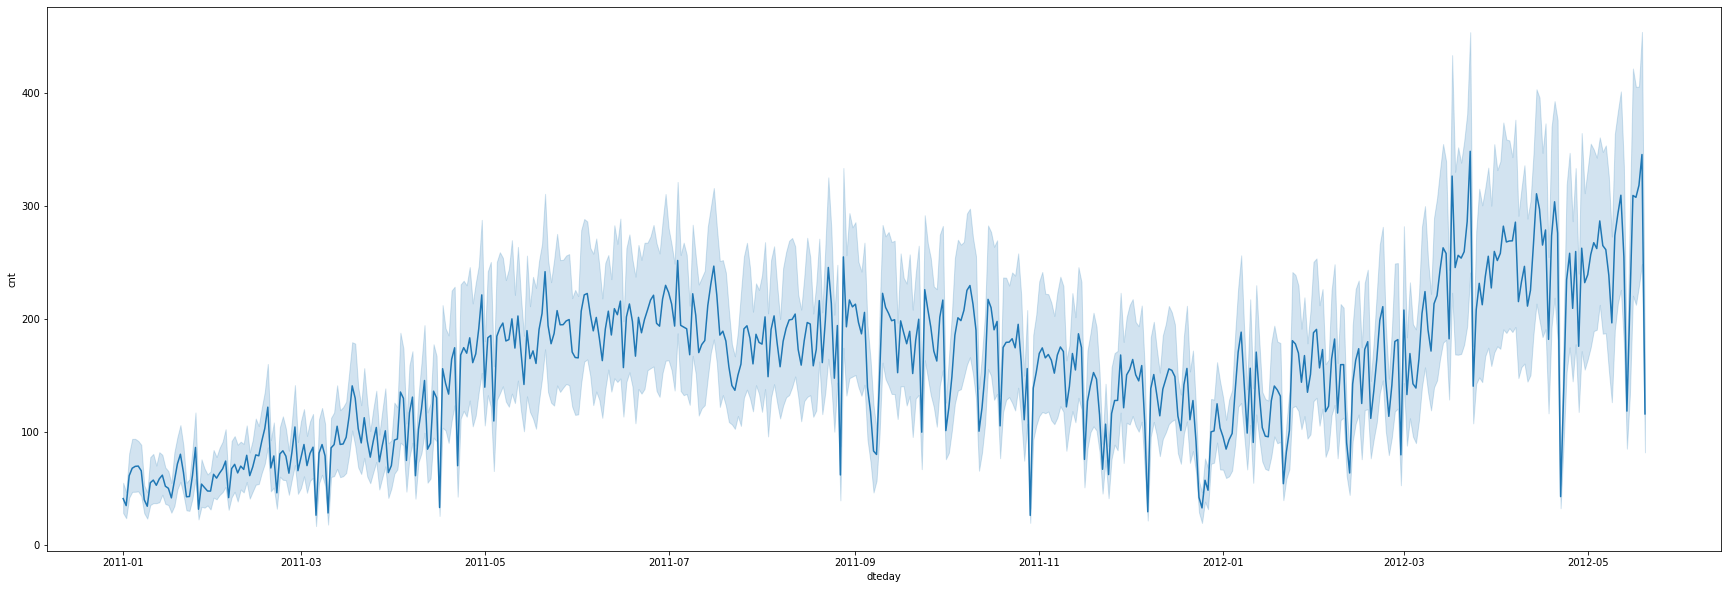

In [11]:
fig, ax = plt.subplots(figsize = (30, 10))
sns.lineplot(x= df_train['dteday'], y= df_train['cnt'])

Realizamos resample para visualizar mejor y reducir ruidos

In [12]:
df_train_resample_D = df_train.resample('D', on = 'dteday').mean()

In [13]:
df_train_resample_D.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01,12.5,1.0,0.0,1.0,11.500000,0.0,6.0,0.0,1.583333,0.344167,0.363625,0.805833,0.160446,13.791667,27.250000,41.041667
2011-01-02,36.0,1.0,0.0,1.0,11.782609,0.0,0.0,0.0,1.956522,0.363478,0.353739,0.696087,0.248539,5.695652,29.130435,34.826087
2011-01-03,58.5,1.0,0.0,1.0,12.318182,0.0,1.0,1.0,1.000000,0.196364,0.189405,0.437273,0.248309,5.454545,55.863636,61.318182
2011-01-04,81.0,1.0,0.0,1.0,11.869565,0.0,2.0,1.0,1.043478,0.200000,0.212122,0.590435,0.160296,4.695652,63.217391,67.913043
2011-01-05,104.0,1.0,0.0,1.0,11.869565,0.0,3.0,1.0,1.000000,0.226957,0.229270,0.436957,0.186900,3.565217,66.000000,69.565217


<AxesSubplot:xlabel='dteday', ylabel='cnt'>

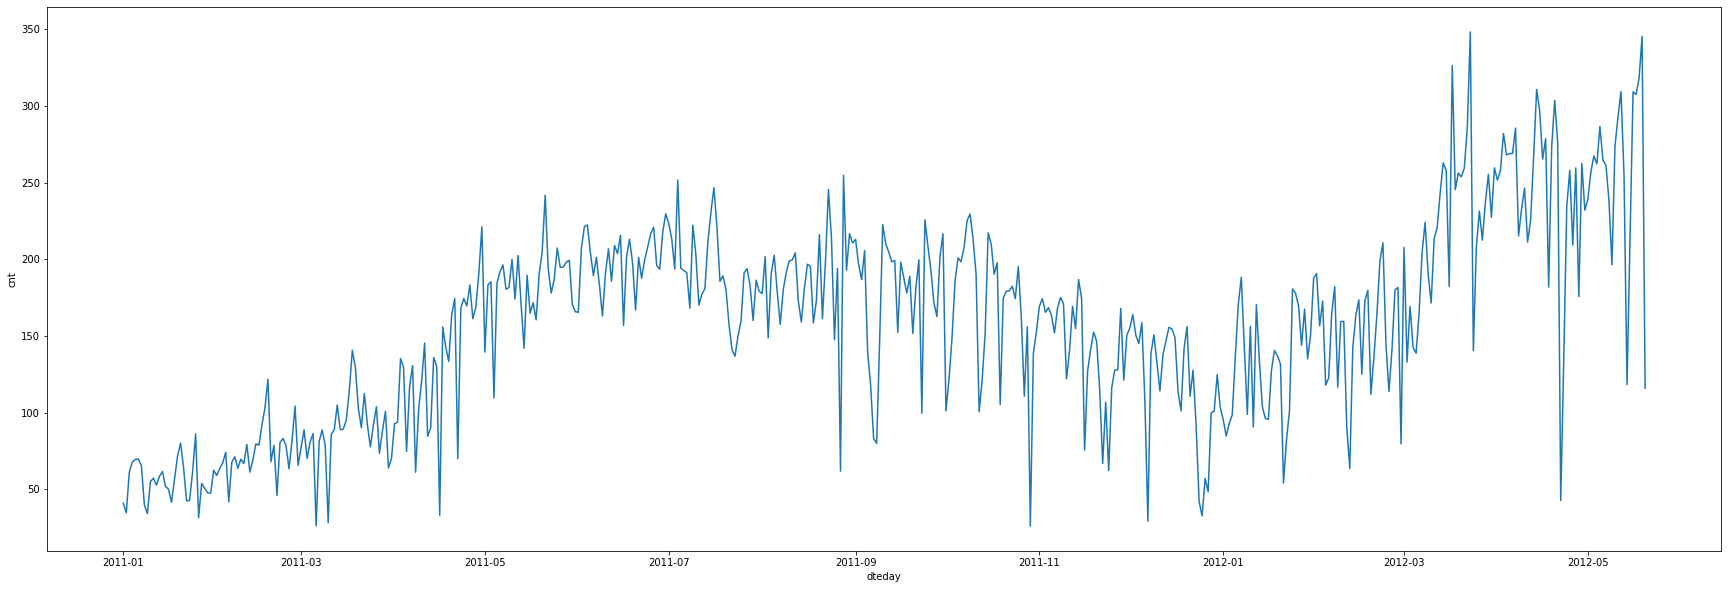

In [14]:
fig, ax = plt.subplots(figsize = (30, 10))
sns.lineplot(x= df_train_resample_D.index, y= df_train_resample_D['cnt'])

Resample semanal

In [15]:
df_train_resample_W = df_train.resample('W', on = 'dteday').mean()

In [16]:
df_train_resample_W.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-02,24.0,1.0,0.0,1.0,11.638298,0.000000,3.063830,0.000000,1.765957,0.353617,0.358787,0.752128,0.203555,9.829787,28.170213,38.000000
2011-01-09,128.5,1.0,0.0,1.0,11.820988,0.000000,3.012346,0.703704,1.259259,0.189136,0.192397,0.493333,0.212834,4.123457,53.950617,58.074074
2011-01-16,291.0,1.0,0.0,1.0,11.742331,0.000000,3.000000,0.705521,1.349693,0.183804,0.189537,0.534479,0.203652,4.134969,51.233129,55.368098
2011-01-23,449.0,1.0,0.0,1.0,12.117647,0.156863,3.078431,0.542484,1.555556,0.180784,0.182322,0.545294,0.222324,3.954248,53.366013,57.320261
2011-01-30,595.0,1.0,0.0,1.0,11.956835,0.000000,2.892086,0.669065,1.625899,0.191367,0.207873,0.680863,0.144749,4.474820,50.913669,55.388489


<AxesSubplot:xlabel='dteday', ylabel='cnt'>

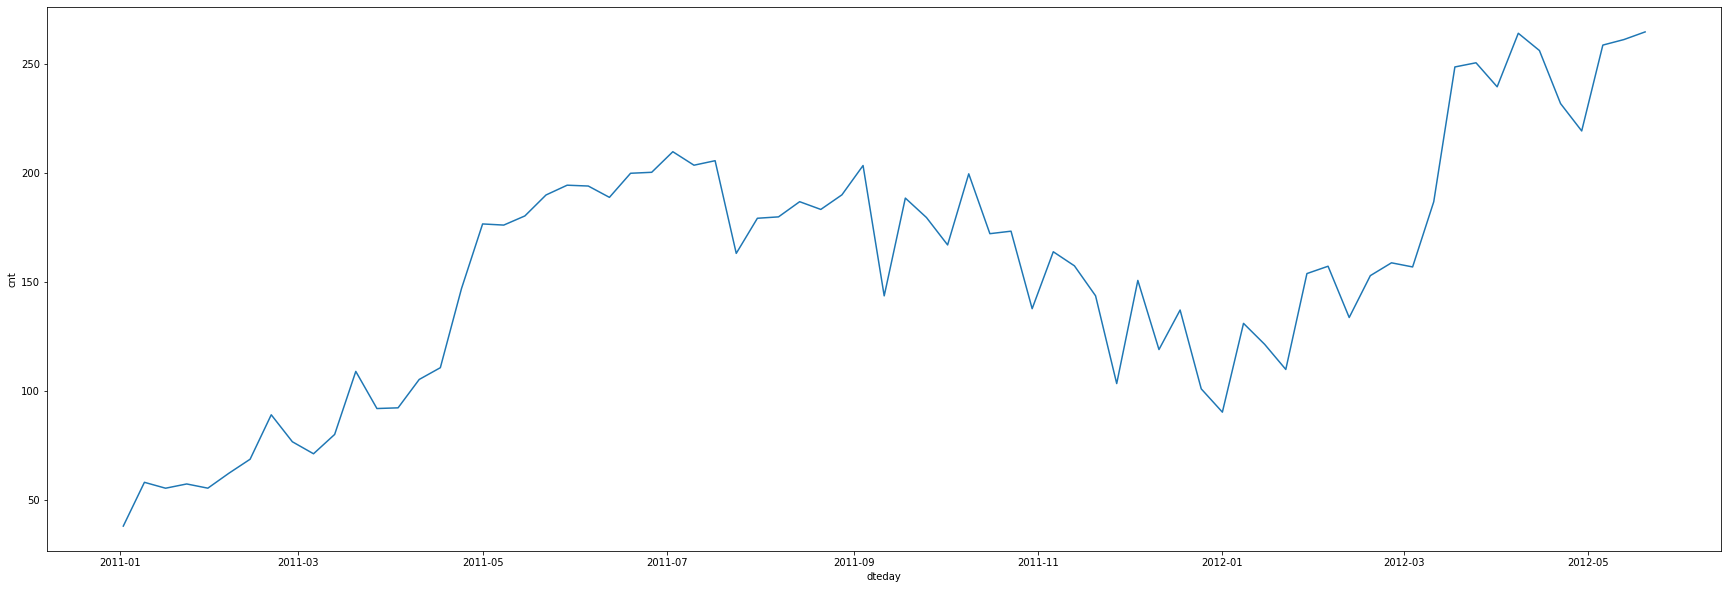

In [17]:
fig, ax = plt.subplots(figsize = (30, 10))
sns.lineplot(x= df_train_resample_W.index, y= df_train_resample_W['cnt'])

Se observa una alta mejora en la reducción de ruido. Deberemos ver cuanto afecta a la precisión de la predicción

#### Componentes de la serie de tiempo

- Media Móvil

Trabajaremos con la muestra semanal

In [18]:
# cantidad de muestras
len(df_train_resample_W)

73

In [19]:
ventana_media_movil = (13)

In [20]:
semanal_promedio_tendencia = df_train_resample_W.cnt.rolling(window=ventana_media_movil, center = True).mean()
semanal_promedio_tendencia

dteday
2011-01-02   NaN
2011-01-09   NaN
2011-01-16   NaN
2011-01-23   NaN
2011-01-30   NaN
              ..
2012-04-22   NaN
2012-04-29   NaN
2012-05-06   NaN
2012-05-13   NaN
2012-05-20   NaN
Freq: W-SUN, Name: cnt, Length: 73, dtype: float64

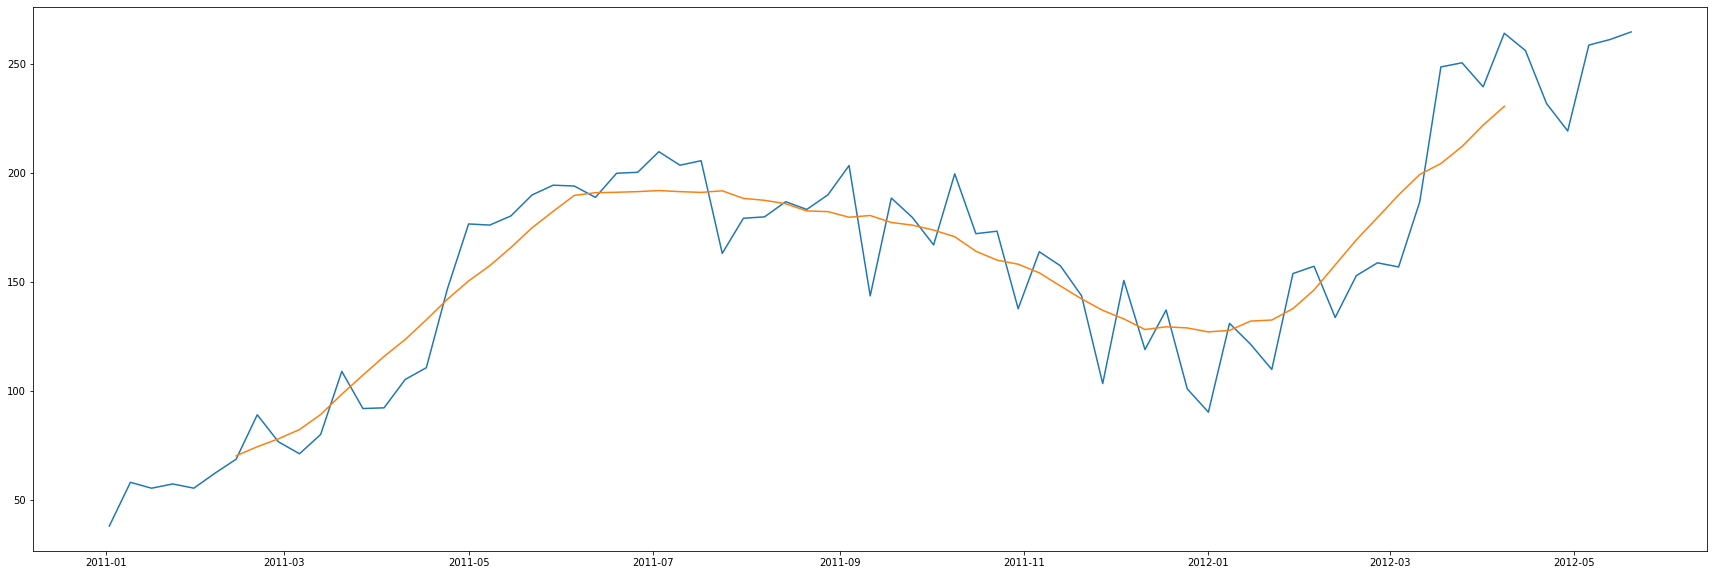

In [21]:
fig, ax = plt.subplots(figsize = (30, 10))
plt.plot(df_train_resample_W.index, df_train_resample_W.cnt)
plt.plot(semanal_promedio_tendencia)

- Estacionalidad

Text(0, 0.5, 'Rentas')

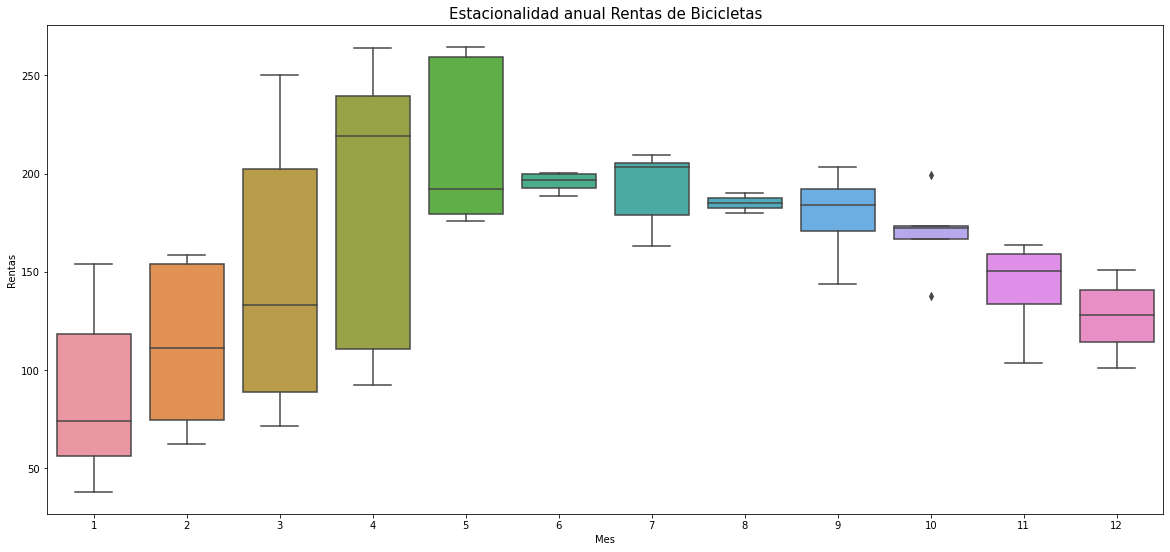

In [22]:
# Agrupamos los datos por mes y mostramos las distribuciones de cada grupo. De esta manera, se visualiza la estacionalidad anual.

plt.figure(figsize = (20,9))
sns.boxplot(data=df_train_resample_W,x=df_train_resample_W.index.month,y= df_train_resample_W.cnt)
plt.title('Estacionalidad anual Rentas de Bicicletas', fontsize = 15)
plt.xlabel('Mes')
plt.ylabel('Rentas')

- Otros analisis

In [23]:
lista_discretos = ['season', 'yr',	'mnth',	'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'cnt']
for columna in lista_discretos:
    df_train_resample_W[columna] = round(df_train_resample_W[columna])


In [24]:
# Correlación
df_corr = df_train_resample_W[['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

In [25]:
df_corr

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,NaN,NaN,0.131471,-0.067126,0.477276,0.485245,0.414218,-0.429631,0.320297
holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,0.131471,NaN,NaN,1.000000,-0.145165,0.076562,0.068986,-0.157539,-0.020858,0.242071
weathersit,-0.067126,NaN,NaN,-0.145165,1.000000,-0.310039,-0.314629,0.391948,0.057560,-0.337329
temp,0.477276,NaN,NaN,0.076562,-0.310039,1.000000,0.998516,0.238083,-0.310675,0.672754
atemp,0.485245,NaN,NaN,0.068986,-0.314629,0.998516,1.000000,0.242020,-0.317205,0.681882
hum,0.414218,NaN,NaN,-0.157539,0.391948,0.238083,0.242020,1.000000,-0.558029,0.019786
windspeed,-0.429631,NaN,NaN,-0.020858,0.057560,-0.310675,-0.317205,-0.558029,1.000000,-0.216430
cnt,0.320297,NaN,NaN,0.242071,-0.337329,0.672754,0.681882,0.019786,-0.216430,1.000000


Text(0.5, 1.0, 'Dia Laboral')

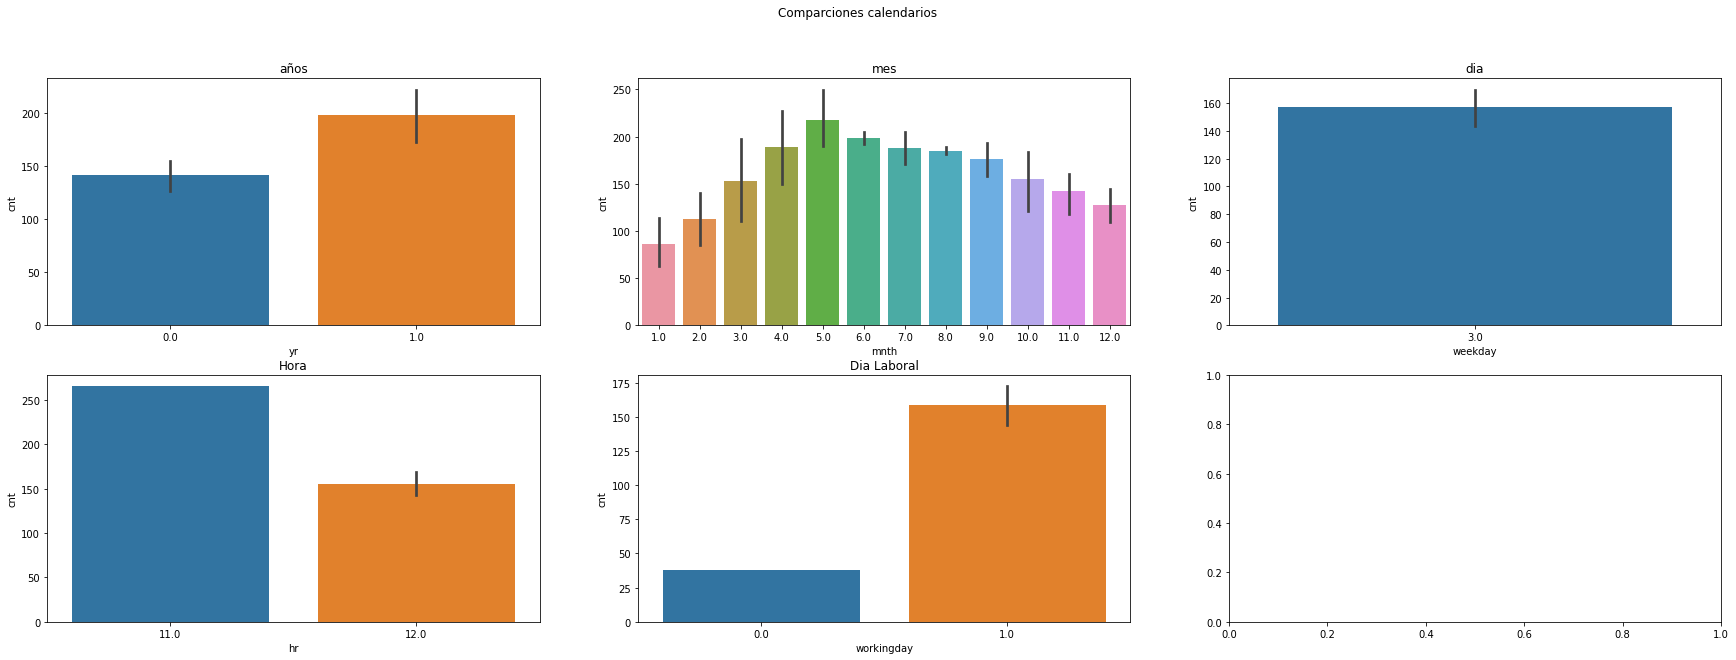

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10), sharey=False)
fig.suptitle('Comparciones calendarios')

# Año
sns.barplot(ax=axes[0,0], x=df_train_resample_W['yr'], y=df_train_resample_W['cnt'])
axes[0,0].set_title('años')

# Mes
sns.barplot(ax=axes[0,1], x=df_train_resample_W['mnth'], y=df_train_resample_W['cnt'])
axes[0,1].set_title('mes')

# Dia
sns.barplot(ax=axes[0,2], x=df_train_resample_W['weekday'], y=df_train_resample_W['cnt'])
axes[0,2].set_title('dia')

# Hora 
sns.barplot(ax=axes[1,0], x=df_train_resample_W['hr'], y=df_train_resample_W['cnt'])
axes[1,0].set_title('Hora')

# Hora 
sns.barplot(ax=axes[1,1], x=df_train_resample_W['workingday'], y=df_train_resample_W['cnt'])
axes[1,1].set_title('Dia Laboral')


Text(0.5, 1.0, 'Velocidad viento')

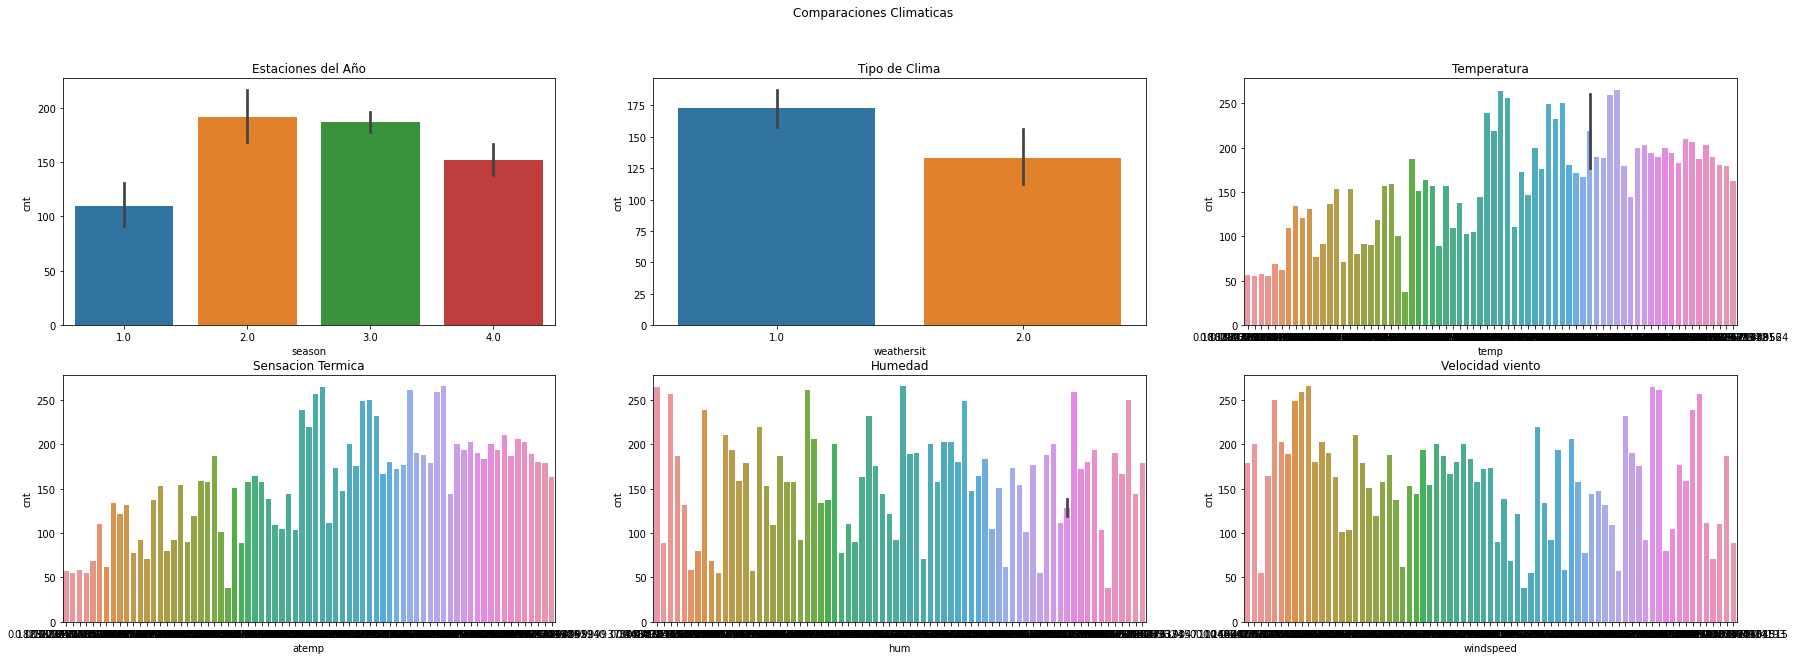

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10), sharey=False)
fig.suptitle('Comparaciones Climaticas')

# Estacion del año
sns.barplot(ax=axes[0,0], x=df_train_resample_W['season'], y=df_train_resample_W['cnt'])
axes[0,0].set_title('Estaciones del Año')

# Tipo de clima
sns.barplot(ax=axes[0,1], x=df_train_resample_W['weathersit'], y=df_train_resample_W['cnt'])
axes[0,1].set_title('Tipo de Clima')

# Temperatura
sns.barplot(ax=axes[0,2], x=df_train_resample_W['temp'], y=df_train_resample_W['cnt'])
axes[0,2].set_title('Temperatura')

# Sensacion Termica
sns.barplot(ax=axes[1,0], x=df_train_resample_W['atemp'], y=df_train_resample_W['cnt'])
axes[1,0].set_title('Sensacion Termica')

# Humedad
sns.barplot(ax=axes[1,1], x=df_train_resample_W['hum'], y=df_train_resample_W['cnt'])
axes[1,1].set_title('Humedad')

# Velocidad viento
sns.barplot(ax=axes[1,2], x=df_train_resample_W['windspeed'], y=df_train_resample_W['cnt'])
axes[1,2].set_title('Velocidad viento')


Busco relaciones con rentas casuales y registradas

In [28]:
df_agrup_dia_rentas = df_train_resample_W[['casual', 'registered', 'cnt']].groupby('dteday', as_index= False).sum()
df_agrup_dia_rentas.head()

,casual,registered,cnt
0,9.829787,28.170213,38.0
1,4.123457,53.950617,58.0
2,4.134969,51.233129,55.0
3,3.954248,53.366013,57.0
4,4.474820,50.913669,55.0


In [29]:
df_agrup_dia_rentas.corr()

,casual,registered,cnt
casual,1.000000,0.784917,0.885856
registered,0.784917,1.000000,0.982779
cnt,0.885856,0.982779,1.000000


## Modelo Predictivo (Series temporales)
### Forecasting con Prophet


Primera etapa. Ejecutamos el modelo solo con columna fecha y renta(cnt)

In [30]:
df_train_resample_W.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-02,24.0,1.0,0.0,1.0,12.0,0.0,3.0,0.0,2.0,0.353617,0.358787,0.752128,0.203555,9.829787,28.170213,38.0
2011-01-09,128.5,1.0,0.0,1.0,12.0,0.0,3.0,1.0,1.0,0.189136,0.192397,0.493333,0.212834,4.123457,53.950617,58.0
2011-01-16,291.0,1.0,0.0,1.0,12.0,0.0,3.0,1.0,1.0,0.183804,0.189537,0.534479,0.203652,4.134969,51.233129,55.0
2011-01-23,449.0,1.0,0.0,1.0,12.0,0.0,3.0,1.0,2.0,0.180784,0.182322,0.545294,0.222324,3.954248,53.366013,57.0
2011-01-30,595.0,1.0,0.0,1.0,12.0,0.0,3.0,1.0,2.0,0.191367,0.207873,0.680863,0.144749,4.474820,50.913669,55.0


In [31]:
df = df_train_resample_W[['cnt']]
df = df.reset_index()
df = df.rename(columns= {'dteday' : 'ds', 'cnt' : 'y'})
df.head()


,ds,y
0,2011-01-02,38.0
1,2011-01-09,58.0
2,2011-01-16,55.0
3,2011-01-23,57.0
4,2011-01-30,55.0


In [32]:
from prophet import Prophet

In [33]:
modelo = Prophet(yearly_seasonality= True, uncertainty_samples = 50, mcmc_samples=50, interval_width= 0.6)
modelo.fit(df)

14:15:09 - cmdstanpy - INFO - CmdStan installation c:\Users\Mauricio\AppData\Local\Programs\Python\Python39\lib\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
14:15:09 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
14:15:09 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

14:15:09 - cmdstanpy - INFO - CmdStan done processing.
14:15:09 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!


Determinamos datos test

In [34]:
df_test_resample_W = df_test[['dteday']].set_index('dteday')
df_test_resample_W = df_test_resample_W.resample('W').mean()
df_test_resample_W = df_test_resample_W.reset_index().dropna()
df_test_resample_W = df_test_resample_W.rename(columns= {'dteday' : 'ds'})

df_test_resample_W.head()

,ds
0,2012-05-20
1,2012-05-27
2,2012-06-03
3,2012-06-10
4,2012-06-17


In [35]:
future = modelo.make_future_dataframe(periods=len(df_test_resample_W), freq= 'W')
future.tail()


,ds
102,2012-12-16
103,2012-12-23
104,2012-12-30
105,2013-01-06
106,2013-01-13


In [36]:
forecast = modelo.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-02,108.161242,7.320929,56.685001,98.882259,116.196564,-73.717756,-83.440725,-61.458964,-73.717756,-83.440725,-61.458964,0.0,0.0,0.0,34.443486
1,2011-01-09,109.072317,17.145295,50.099758,100.734467,116.268503,-70.040173,-79.188527,-62.687262,-70.040173,-79.188527,-62.687262,0.0,0.0,0.0,39.032144
2,2011-01-16,109.983391,21.906283,65.667633,102.589678,116.965488,-65.073510,-74.717241,-56.124147,-65.073510,-74.717241,-56.124147,0.0,0.0,0.0,44.909881
3,2011-01-23,110.932158,27.212484,76.293908,104.409589,117.907076,-60.303758,-69.525582,-54.397255,-60.303758,-69.525582,-54.397255,0.0,0.0,0.0,50.628400
4,2011-01-30,111.880925,32.112169,72.639060,105.440670,118.388398,-55.323354,-63.205854,-46.423478,-55.323354,-63.205854,-46.423478,0.0,0.0,0.0,56.557571


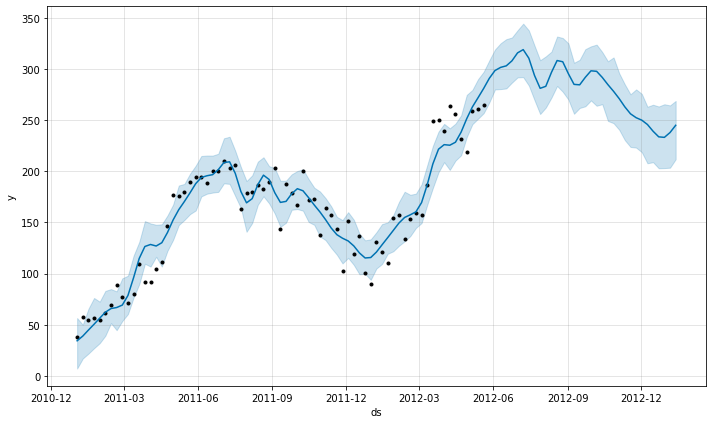

In [37]:
fig1 = modelo.plot(forecast)

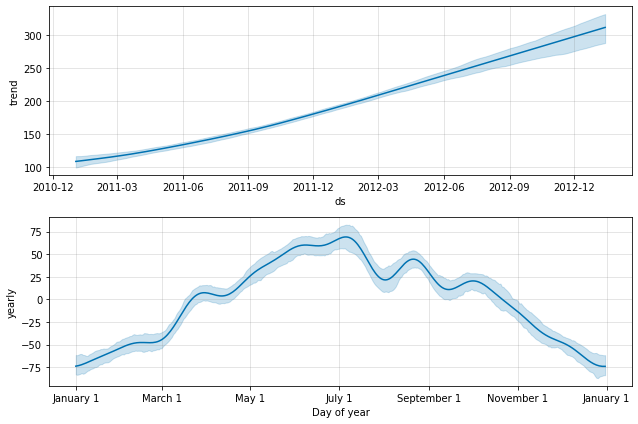

In [38]:
fig2 = modelo.plot_components(forecast)

### Evaluamos el Modelo de una variable

In [39]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [40]:
df_cv = cross_validation(modelo, horizon = '30 days')

  0%|          | 0/8 [00:00<?, ?it/s]

14:15:11 - cmdstanpy - INFO - CmdStan installation c:\Users\Mauricio\AppData\Local\Programs\Python\Python39\lib\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
14:15:11 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
14:15:11 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

14:15:12 - cmdstanpy - INFO - CmdStan done processing.
14:15:12 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!


14:15:12 - cmdstanpy - INFO - CmdStan installation c:\Users\Mauricio\AppData\Local\Programs\Python\Python39\lib\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
14:15:12 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
14:15:12 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

14:15:12 - cmdstanpy - INFO - CmdStan done processing.
14:15:12 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!


14:15:12 - cmdstanpy - INFO - CmdStan installation c:\Users\Mauricio\AppData\Local\Programs\Python\Python39\lib\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
14:15:12 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
14:15:12 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

14:15:13 - cmdstanpy - INFO - CmdStan done processing.
14:15:13 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!


14:15:13 - cmdstanpy - INFO - CmdStan installation c:\Users\Mauricio\AppData\Local\Programs\Python\Python39\lib\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
14:15:13 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
14:15:13 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

14:15:13 - cmdstanpy - INFO - CmdStan done processing.
14:15:13 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!


14:15:14 - cmdstanpy - INFO - CmdStan installation c:\Users\Mauricio\AppData\Local\Programs\Python\Python39\lib\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
14:15:14 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
14:15:14 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

14:15:14 - cmdstanpy - INFO - CmdStan done processing.
14:15:14 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!


14:15:14 - cmdstanpy - INFO - CmdStan installation c:\Users\Mauricio\AppData\Local\Programs\Python\Python39\lib\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
14:15:14 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
14:15:14 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

14:15:15 - cmdstanpy - INFO - CmdStan done processing.
14:15:15 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!


14:15:15 - cmdstanpy - INFO - CmdStan installation c:\Users\Mauricio\AppData\Local\Programs\Python\Python39\lib\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
14:15:15 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
14:15:15 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

14:15:15 - cmdstanpy - INFO - CmdStan done processing.
14:15:15 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!


14:15:16 - cmdstanpy - INFO - CmdStan installation c:\Users\Mauricio\AppData\Local\Programs\Python\Python39\lib\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
14:15:16 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
14:15:16 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

14:15:16 - cmdstanpy - INFO - CmdStan done processing.
14:15:16 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!


In [41]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-01-08,91.939612,75.586918,116.857571,131.0,2012-01-06
1,2012-01-15,95.322646,72.435241,117.174234,121.0,2012-01-06
2,2012-01-22,98.907961,81.522243,117.349702,110.0,2012-01-06
3,2012-01-29,101.964631,78.893123,128.813784,154.0,2012-01-06
4,2012-02-05,106.687616,82.613338,128.911108,157.0,2012-01-06


In [42]:
df_perform = performance_metrics(df_cv)
df_perform.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,29,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,16 days 00:00:00,2251.569371,45.237325,40.106550,0.186667,0.178363,0.200484,0.247126
std,8 days 12:21:09.491008020,1212.059858,14.576719,14.737012,0.057909,0.078721,0.062580,0.262091
min,2 days 00:00:00,225.632600,15.021072,10.527734,0.067086,0.035900,0.072047,0.000000
25%,9 days 00:00:00,1352.197429,36.772237,30.131083,0.135378,0.129589,0.149966,0.000000
50%,16 days 00:00:00,2257.694282,47.515201,41.940491,0.199260,0.182015,0.209636,0.333333
75%,23 days 00:00:00,3132.920493,55.972498,49.957227,0.224812,0.243173,0.242121,0.333333
max,30 days 00:00:00,4596.417103,67.796881,66.655118,0.291292,0.292812,0.313595,0.666667


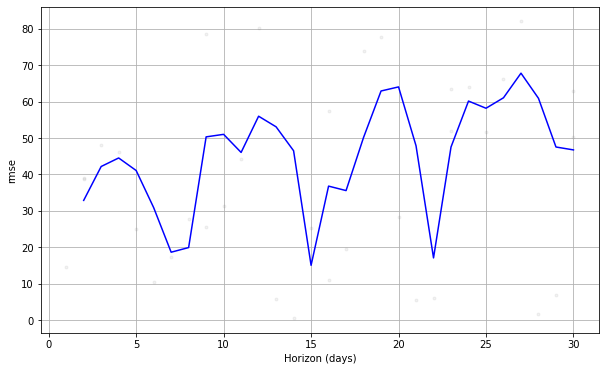

In [43]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [44]:
print('El RMSE es:', df_perform.rmse.mean())

El RMSE es: 45.237324718892225


In [45]:
df_p = performance_metrics(df_cv, rolling_window = 1)

In [46]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,30 days,2106.165447,45.892978,38.277917,0.182875,0.182015,0.195257,0.285714


Corremos modelo con mas variables

Primer Prueba. Quitamos columnas que no vamos a utilizar, agrupamos fecha y valores medios

In [239]:
df_grupo = df_train_resample_W[['cnt', 'season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
#df_grupo = df_train_resample_W[['cnt', 'season', 'workingday', 'weathersit', 'temp', 'atemp', 'windspeed']]
df_grupo = df_grupo.reset_index('dteday')
df_grupo = df_grupo.rename(columns= {'dteday' : 'ds', 'cnt' : 'y'})
df_grupo.head()

,ds,y,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-02,38.0,1.0,0.0,3.0,0.0,2.0,0.353617,0.358787,0.752128,0.203555
1,2011-01-09,58.0,1.0,0.0,3.0,1.0,1.0,0.189136,0.192397,0.493333,0.212834
2,2011-01-16,55.0,1.0,0.0,3.0,1.0,1.0,0.183804,0.189537,0.534479,0.203652
3,2011-01-23,57.0,1.0,0.0,3.0,1.0,2.0,0.180784,0.182322,0.545294,0.222324
4,2011-01-30,55.0,1.0,0.0,3.0,1.0,2.0,0.191367,0.207873,0.680863,0.144749


In [240]:
from prophet import Prophet

In [241]:
modelo2 = Prophet()
modelo2.add_regressor('season')
modelo2.add_regressor('holiday')
modelo2.add_regressor('weekday')
modelo2.add_regressor('weathersit')
modelo2.add_regressor('workingday')
modelo2.add_regressor('temp')
modelo2.add_regressor('atemp')
modelo2.add_regressor('hum')
modelo2.add_regressor('windspeed')
modelo2.fit(df_grupo)

17:38:43 - cmdstanpy - INFO - Chain [1] start processing
17:38:43 - cmdstanpy - INFO - Chain [1] done processing


In [252]:
df_test_resample_W = df_test.resample('W', on = 'dteday').mean()
df_test_resample_W = df_test_resample_W[['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
#df_test_resample_W = df_test_resample_W[['season', 'workingday', 'weathersit', 'temp', 'atemp', 'windspeed']]
df_test_resample_W = df_test_resample_W.reset_index()
df_test_resample_W = df_test_resample_W.rename(columns= {'dteday' : 'ds'})

In [253]:
df_test_resample_W.head()

,ds,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2012-05-20,2.0,0.000000,0.0,0.000000,1.150000,0.633000,0.594695,0.530000,0.295535
1,2012-05-27,2.0,0.000000,3.0,0.714286,1.577381,0.650357,0.607065,0.749286,0.168711
2,2012-06-03,2.0,0.142857,3.0,0.571429,1.363095,0.658810,0.620590,0.617381,0.204249
3,2012-06-10,2.0,0.000000,3.0,0.714286,1.130952,0.625952,0.589379,0.531726,0.168896
4,2012-06-17,2.0,0.000000,3.0,0.714286,1.369048,0.648810,0.608505,0.609345,0.215351


In [254]:
lista_discretos = ['season','workingday', 'weathersit']
for columna in lista_discretos:
    df_test_resample_W[columna] = round(df_test_resample_W[columna])

In [255]:
df_grupo = df_grupo.set_index('ds')

KeyError: "None of ['ds'] are in the columns"

In [256]:
df_grupo.head()

,y,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
ds,,,,,,,,,,
2011-01-02,38.0,1.0,0.0,3.0,0.0,2.0,0.353617,0.358787,0.752128,0.203555
2011-01-09,58.0,1.0,0.0,3.0,1.0,1.0,0.189136,0.192397,0.493333,0.212834
2011-01-16,55.0,1.0,0.0,3.0,1.0,1.0,0.183804,0.189537,0.534479,0.203652
2011-01-23,57.0,1.0,0.0,3.0,1.0,2.0,0.180784,0.182322,0.545294,0.222324
2011-01-30,55.0,1.0,0.0,3.0,1.0,2.0,0.191367,0.207873,0.680863,0.144749


In [257]:
df_test_resample_W = df_test_resample_W.set_index('ds')

In [258]:
df_test_resample_W.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
ds,,,,,,,,,
2012-05-20,2.0,0.000000,0.0,0.0,1.0,0.633000,0.594695,0.530000,0.295535
2012-05-27,2.0,0.000000,3.0,1.0,2.0,0.650357,0.607065,0.749286,0.168711
2012-06-03,2.0,0.142857,3.0,1.0,1.0,0.658810,0.620590,0.617381,0.204249
2012-06-10,2.0,0.000000,3.0,1.0,1.0,0.625952,0.589379,0.531726,0.168896
2012-06-17,2.0,0.000000,3.0,1.0,1.0,0.648810,0.608505,0.609345,0.215351


In [259]:
def estacion(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
            return df_test_resample_W[date:]['season'].values[0]
    else:
            return (df_grupo[date:]['season']).values[0]
    
    return 0

def clima(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_resample_W[date:]['weathersit'].values[0]
    else:
        return (df_grupo[date:]['weathersit']).values[0]
    
    return 0

def temp(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_resample_W[date:]['temp'].values[0]
    else:
        return (df_grupo[date:]['temp']).values[0]
    
    return 0

def sen_tem(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_resample_W[date:]['atemp'].values[0]
    else:
        return (df_grupo[date:]['atemp']).values[0]
    
    return 0

def vacaciones(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_resample_W[date:]['holiday'].values[0]
    else:
        return (df_grupo[date:]['holiday']).values[0]
    
    return 0

def dia_semana(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_resample_W[date:]['weekday'].values[0]
    else:
        return (df_grupo[date:]['weekday']).values[0]
    
    return 0

def feriado(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_resample_W[date:]['workingday'].values[0]
    else:
        return (df_grupo[date:]['workingday']).values[0]
    
    return 0

def humedad(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_resample_W[date:]['hum'].values[0]
    else:
        return (df_grupo[date:]['hum']).values[0]
    
    return 0

def viento(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_resample_W[date:]['windspeed'].values[0]
    else:
        return (df_grupo[date:]['windspeed']).values[0]
    
    return 0



In [260]:
future = modelo2.make_future_dataframe(periods= len(df_test_resample_W)-2, freq= 'W')
future['season'] = future['ds'].apply(estacion)
future['holiday'] = future['ds'].apply(vacaciones)
future['weekday'] = future['ds'].apply(dia_semana)
future['weathersit'] = future['ds'].apply(clima)
future['workingday'] = future['ds'].apply(feriado)
future['temp'] = future['ds'].apply(temp)
future['atemp'] = future['ds'].apply(sen_tem)
future['hum'] = future['ds'].apply(humedad)
future['windspeed'] = future['ds'].apply(viento)

In [261]:
future

,ds,season,holiday,weekday,weathersit,workingday,temp,atemp,hum,windspeed
0,2011-01-02,1.0,0.000000,3.000000,2.0,0.0,0.353617,0.358787,0.752128,0.203555
1,2011-01-09,1.0,0.000000,3.000000,1.0,1.0,0.189136,0.192397,0.493333,0.212834
2,2011-01-16,1.0,0.000000,3.000000,1.0,1.0,0.183804,0.189537,0.534479,0.203652
3,2011-01-23,1.0,0.000000,3.000000,2.0,1.0,0.180784,0.182322,0.545294,0.222324
4,2011-01-30,1.0,0.000000,3.000000,2.0,1.0,0.191367,0.207873,0.680863,0.144749
...,...,...,...,...,...,...,...,...,...,...
100,2012-12-02,4.0,0.000000,2.994012,2.0,1.0,0.303952,0.315635,0.666886,0.121911
101,2012-12-09,4.0,0.000000,3.000000,2.0,1.0,0.387024,0.387526,0.725119,0.163654
102,2012-12-16,4.0,0.000000,3.000000,2.0,1.0,0.335833,0.338282,0.668274,0.165962
103,2012-12-23,3.0,0.000000,3.000000,1.0,1.0,0.329286,0.326562,0.625714,0.221576


In [262]:
df_test_resample_W =  df_test_resample_W.reset_index()
df_test_resample_W.head()

,ds,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2012-05-20,2.0,0.000000,0.0,0.0,1.0,0.633000,0.594695,0.530000,0.295535
1,2012-05-27,2.0,0.000000,3.0,1.0,2.0,0.650357,0.607065,0.749286,0.168711
2,2012-06-03,2.0,0.142857,3.0,1.0,1.0,0.658810,0.620590,0.617381,0.204249
3,2012-06-10,2.0,0.000000,3.0,1.0,1.0,0.625952,0.589379,0.531726,0.168896
4,2012-06-17,2.0,0.000000,3.0,1.0,1.0,0.648810,0.608505,0.609345,0.215351


In [263]:
forecast2 = modelo2.predict(future)


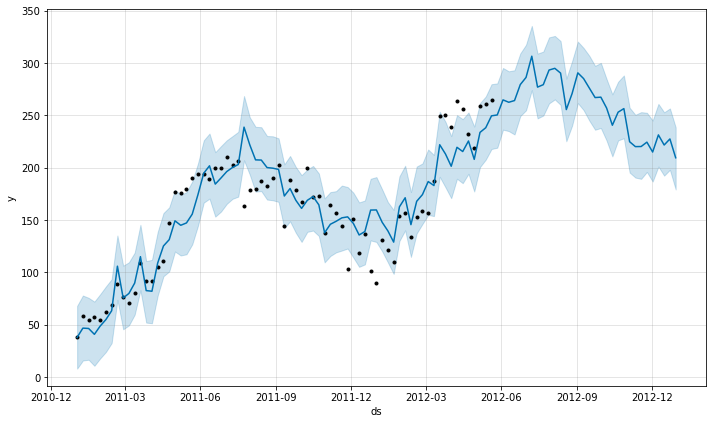

In [266]:
figura2 = modelo2.plot(forecast2)

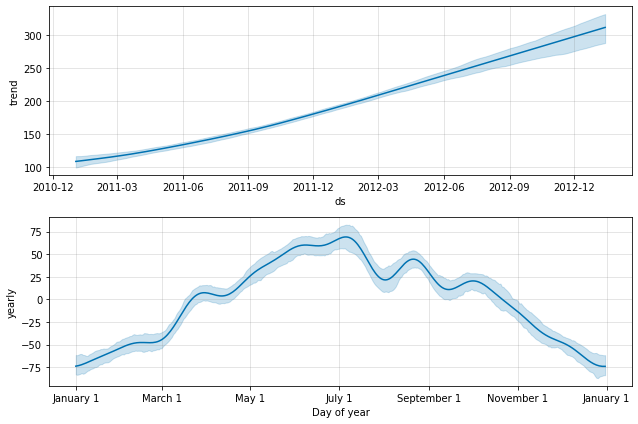

In [267]:
fig3 = modelo.plot_components(forecast)

In [268]:
from prophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(modelo2, horizon='10 days')
df_p = performance_metrics(df_cv)
df_p.head(5)

  0%|          | 0/93 [00:00<?, ?it/s]

17:40:45 - cmdstanpy - INFO - Chain [1] start processing
17:40:51 - cmdstanpy - INFO - Chain [1] done processing
17:40:51 - cmdstanpy - INFO - Chain [1] start processing
17:40:52 - cmdstanpy - INFO - Chain [1] done processing
17:40:53 - cmdstanpy - INFO - Chain [1] start processing
17:40:57 - cmdstanpy - INFO - Chain [1] done processing
17:40:58 - cmdstanpy - INFO - Chain [1] start processing
17:40:58 - cmdstanpy - INFO - Chain [1] done processing
17:40:59 - cmdstanpy - INFO - Chain [1] start processing
17:40:59 - cmdstanpy - INFO - Chain [1] done processing
17:40:59 - cmdstanpy - INFO - Chain [1] start processing
17:40:59 - cmdstanpy - INFO - Chain [1] done processing
17:41:00 - cmdstanpy - INFO - Chain [1] start processing
17:41:00 - cmdstanpy - INFO - Chain [1] done processing
17:41:01 - cmdstanpy - INFO - Chain [1] start processing
17:41:01 - cmdstanpy - INFO - Chain [1] done processing
17:41:02 - cmdstanpy - INFO - Chain [1] start processing
17:41:02 - cmdstanpy - INFO - Chain [1]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,785.124440,28.020072,22.359766,0.135782,0.124107,0.138368,0.285714
1,2 days,898.640891,29.977340,21.843134,0.136638,0.107940,0.153193,0.538462
2,3 days,1147.892034,33.880555,26.551323,0.166728,0.163381,0.164634,0.357143
3,4 days,1044.932383,32.325414,21.011114,0.130194,0.060111,0.133651,0.615385
4,5 days,939.284607,30.647750,26.237412,0.175836,0.151212,0.168203,0.230769


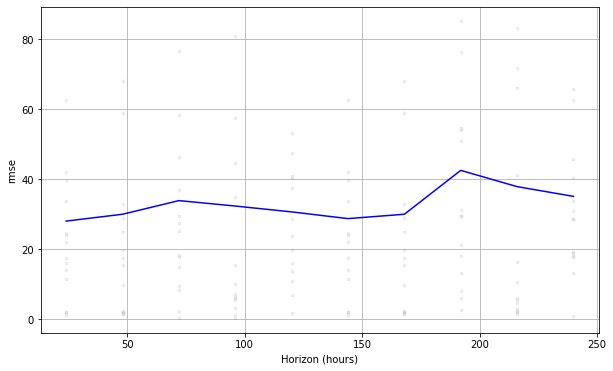

In [269]:
from prophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='rmse')

### Evaluamos el Modelo de varias variables

In [270]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [271]:
df_cv = cross_validation(modelo2, horizon = '10 days')

  0%|          | 0/93 [00:00<?, ?it/s]

17:42:17 - cmdstanpy - INFO - Chain [1] start processing
17:42:23 - cmdstanpy - INFO - Chain [1] done processing
17:42:24 - cmdstanpy - INFO - Chain [1] start processing
17:42:24 - cmdstanpy - INFO - Chain [1] done processing
17:42:25 - cmdstanpy - INFO - Chain [1] start processing
17:42:29 - cmdstanpy - INFO - Chain [1] done processing
17:42:30 - cmdstanpy - INFO - Chain [1] start processing
17:42:30 - cmdstanpy - INFO - Chain [1] done processing
17:42:30 - cmdstanpy - INFO - Chain [1] start processing
17:42:30 - cmdstanpy - INFO - Chain [1] done processing
17:42:31 - cmdstanpy - INFO - Chain [1] start processing
17:42:31 - cmdstanpy - INFO - Chain [1] done processing
17:42:32 - cmdstanpy - INFO - Chain [1] start processing
17:42:32 - cmdstanpy - INFO - Chain [1] done processing
17:42:32 - cmdstanpy - INFO - Chain [1] start processing
17:42:33 - cmdstanpy - INFO - Chain [1] done processing
17:42:33 - cmdstanpy - INFO - Chain [1] start processing
17:42:33 - cmdstanpy - INFO - Chain [1]

In [272]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-02-06,78.130933,75.405604,80.763770,62.0,2011-02-05
1,2011-02-13,145.393126,136.374784,154.160599,69.0,2011-02-05
2,2011-02-13,54.073106,52.787398,55.651928,69.0,2011-02-10
3,2011-02-20,60.324752,56.018322,65.340488,89.0,2011-02-10
4,2011-02-20,126.376328,126.319007,126.430030,89.0,2011-02-15


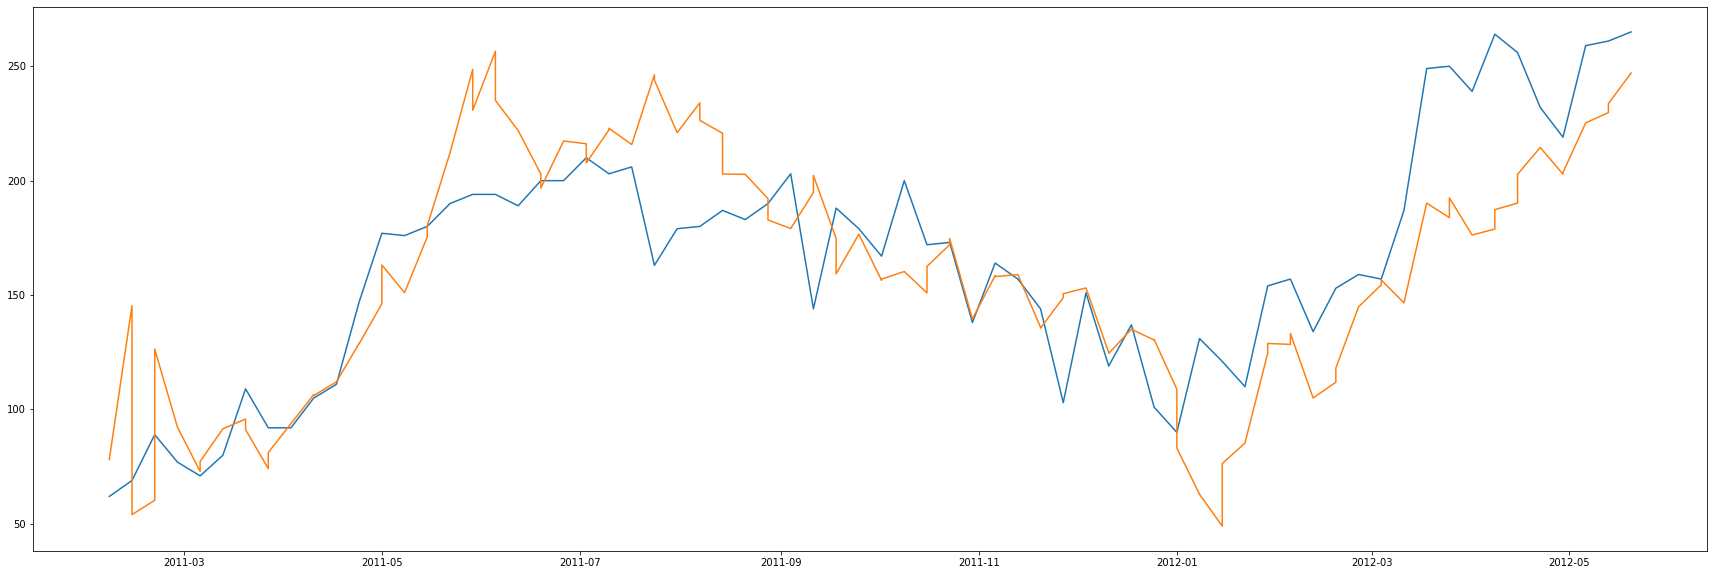

In [273]:
fig, ax = plt.subplots(figsize = (30, 10))
plt.plot(df_cv['ds'], df_cv.y)
plt.plot(df_cv['ds'], df_cv.yhat)

In [274]:
df_perform = performance_metrics(df_cv)
df_perform.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,10,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5 days 12:00:00,1101.523097,32.906294,25.141880,0.159916,0.122697,0.162152,0.406044
std,3 days 00:39:48.990594023,319.479520,4.558135,4.301653,0.037486,0.044247,0.026768,0.152366
min,1 days 00:00:00,785.124440,28.020072,21.011114,0.126213,0.049550,0.131302,0.230769
25%,3 days 06:00:00,898.640891,29.977340,21.972292,0.135996,0.107940,0.142074,0.285714
50%,5 days 12:00:00,992.108495,31.486582,23.483723,0.143376,0.120988,0.158913,0.332418
75%,7 days 18:00:00,1210.570393,34.789296,26.472845,0.173559,0.155544,0.168174,0.538462
max,10 days 00:00:00,1808.819227,42.530215,34.289968,0.245229,0.187871,0.213567,0.615385


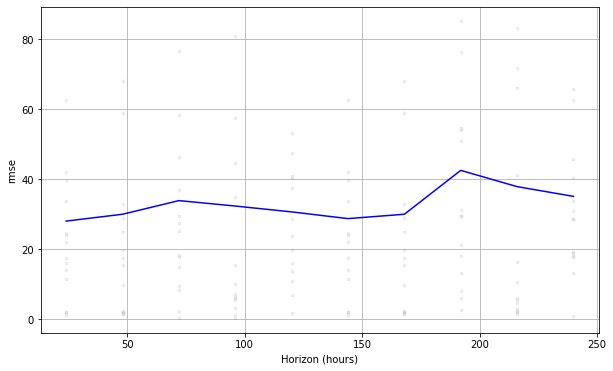

In [275]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [276]:
print('El RMSE es:', df_perform.rmse.mean())

El RMSE es: 32.90629370715608


In [277]:
df_p = performance_metrics(df_cv, rolling_window = 1)

In [278]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,10 days,1105.755981,33.252909,25.238514,0.160691,0.122722,0.162639,0.402985
